# AWS Billing Report 

https://d-906760626e.awsapps.com/start


In [63]:
import boto3
from datetime import date
from dateutil.relativedelta import relativedelta
import seaborn as sns
import pandas as pd
import subprocess
from time import time, sleep
import webbrowser
from boto3.session import Session
import matplotlib.pyplot as plt


https://stackoverflow.com/questions/62311866/how-to-use-the-aws-python-sdk-while-connecting-via-sso-credentials

In [64]:
# if your sso is setup in a different region, you will
# want to include region_name=sso_region in the 
# session constructor below

def AWS_SSO_Login():
    session = Session()
    start_url = 'https://d-906760626e.awsapps.com/start'
    region = 'us-east-1' 
    sso_oidc = session.client('sso-oidc',region_name=region)
    client_creds = sso_oidc.register_client(
        clientName='myapp',
        clientType='public',
    )
    device_authorization = sso_oidc.start_device_authorization(
        clientId=client_creds['clientId'],
        clientSecret=client_creds['clientSecret'],
        startUrl=start_url,
    )
    url = device_authorization['verificationUriComplete']
    device_code = device_authorization['deviceCode']
    expires_in = device_authorization['expiresIn']
    interval = device_authorization['interval']
    webbrowser.open(url, autoraise=True)
    for n in range(1, expires_in // interval + 1):
        sleep(interval)
        try:
            token = sso_oidc.create_token(
                grantType='urn:ietf:params:oauth:grant-type:device_code',
                deviceCode=device_code,
                clientId=client_creds['clientId'],
                clientSecret=client_creds['clientSecret'],
            )
            return_code = True
            break
        except sso_oidc.exceptions.AuthorizationPendingException:
            return_code = False
            pass
    return return_code,session,token

In [65]:
def Get_AWS_Account_Keys(session, token, account_no):
    region = 'us-east-1'
    account_id = account_no
    access_token = token['accessToken']
    sso = session.client('sso',region_name=region)
    account_roles = sso.list_account_roles(
        accessToken=access_token,
        accountId=account_id,
    )
    #print(account_roles)
    roles = account_roles['roleList'] # 'roleList'
    # simplifying here for illustrative purposes
    role = roles[0]
    #-------------
    #print(role)
    #-------------
    # earlier versions of the sso api returned the 
    # role credentials directly, but now they appear
    # to be in a subkey called `roleCredentials`
    if role['roleName'] == 'MarketplaceRead':
        role['roleName'] = 'BillingReadOnly'

    role_creds = sso.get_role_credentials(
        roleName=role['roleName'],
        #roleName='ReadOnly',
        accountId=account_id,
        accessToken=access_token,
    )['roleCredentials']
    #print(role_creds)
    session = Session(
        region_name=region,
        aws_access_key_id=role_creds['accessKeyId'],
        aws_secret_access_key=role_creds['secretAccessKey'],
        aws_session_token=role_creds['sessionToken'],
    )
    #-------------
    #print(role)
    #-------------
    return role_creds

# Accounts in AWS

## Enviroment values: production, development, sandbox, share services, non-prod

In [438]:
aws_name_accounts = []
# ======== >>>  Amperwave accounts <<< =========
#-----------------------------------------------
aws_account_name = 'AmperWave_Prod'
aws_account = '847645690781'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave-NonProd'
aws_account = '194118743403'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WO On Demand'
aws_account = '673312057223'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WOS-PROD-01'
aws_account = '365148103379'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------


In [66]:
aws_name_accounts = []
#-----------------------------------------------
aws_account_name = 'Entercom Communications'
aws_account = '724972922289'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes' # yes This is the MAIN Account
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------------a2 prod --------------
'''
aws_account_name = 'Aardvark2-Prod A2'
aws_account = '910555647794'
aws_enviroment = 'production'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#--------------------------------Data Tean ---------------
aws_account_name = 'AdvancedAudio Data Team'
aws_account = '900072481376'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'no' # no access in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave_Prod'
aws_account = '847645690781'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'AmperWave-NonProd'
aws_account = '194118743403'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------A1 -----------------
aws_account_name = 'cobradev A1'
aws_account = '094289890028'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no accdsz in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------AW ??? ----------------
aws_account_name = 'Core Dev A1 or AW'
aws_account = '110926662372'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no Access in AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------------A1 --------------
aws_account_name = 'cobraprod A1'
aws_account = '094289890028 '
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # This account canot be accces by code
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------A1----------------
aws_account_name = 'Entercom A1'
aws_account = '787242951186'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS 
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#----------------------------------A1-------------
aws_account_name = 'Entercom Production A1'
aws_account = '477779916141'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------- ?? ----------------
aws_account_name = 'Metadata Dev'
aws_account = '406307397670'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------ROC-----------------
aws_account_name = 'OpsConsole-NonProd ROC'
aws_account = '659560379904'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes' # yes
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-------------------------------A2----------------
aws_account_name = 'Personalization A2'
aws_account = '354704368578'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no acess to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#------------------------------- A2 ??? ----------------
aws_account_name = 'PubCMSDev A2'
aws_account = '643170364694'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'Shared_Services'
aws_account = '477185329132'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#---------------------------- ?? -------------------
aws_account_name = 'uap-sandbox'
aws_account = '372074449155'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'Unity Dev'
aws_account = '077691119997'
aws_enviroment = 'production'
aws_graph = 'no'
aws_access = 'no' # no access to AWS
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'UserTokenSandbox'
aws_account = '967638613557'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WO On Demand'
aws_account = '673312057223'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
aws_account_name = 'WOS-PROD-01'
aws_account = '365148103379'
aws_enviroment = 'production'
aws_graph = 'yes'
aws_access = 'yes'
record = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]
aws_name_accounts.append(record)
#-----------------------------------------------
'''

"\naws_account_name = 'Aardvark2-Prod A2'\naws_account = '910555647794'\naws_enviroment = 'production'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'yes'\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#--------------------------------Data Tean ---------------\naws_account_name = 'AdvancedAudio Data Team'\naws_account = '900072481376'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'no' # no access in AWS\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#-----------------------------------------------\naws_account_name = 'AmperWave_Prod'\naws_account = '847645690781'\naws_enviroment = 'production'\naws_graph = 'yes'\naws_access = 'yes'\nrecord = [aws_account_name,aws_account,aws_enviroment,aws_graph,aws_access]\naws_name_accounts.append(record)\n#-----------------------------------------------\naws_account_name = 'AmperWave-No

In [67]:
for name_account in aws_name_accounts:
    print(name_account)

['Entercom Communications', '724972922289', 'production', 'yes', 'yes']


## Active Accoutns:

In [68]:
for name_account in aws_name_accounts:
    if name_account[4] == 'yes':
        print(name_account)

['Entercom Communications', '724972922289', 'production', 'yes', 'yes']


## Potential accounts that can be deleted...

In [69]:
for name_account in aws_name_accounts:
    if name_account[4] == 'no':
        print(name_account)

# Access AWS and get the Keys

In [70]:
aws_profiles = []
return_code, session,token = AWS_SSO_Login()
if return_code:
    for name_account in aws_name_accounts:
        if name_account[4] == 'yes':
            print("Getting keys for: " + name_account[0])
            aws_account_name = name_account[0]
            aws_account = name_account[1]
            role_creds = Get_AWS_Account_Keys(session, token, aws_account)
            aws_access_key_id = role_creds['accessKeyId']
            aws_secret_access_key = role_creds['secretAccessKey']
            aws_session_token = role_creds['sessionToken']
            aws_keys = {'name':aws_account_name, 'account': aws_account, 'key':aws_access_key_id, 'access':aws_secret_access_key, 'token':aws_session_token}
            aws_profiles.append(aws_keys)
else:
    print("Unable to Login in AWS SSO")


Getting keys for: Entercom Communications


In [71]:
for profiles in aws_profiles:
    print(profiles['name'])

Entercom Communications


# Get the correct Dates

In [72]:
# Find the start and end dates for last month
today = date.today()
first_day_of_previous_month = (today.replace(day=1) - relativedelta(months=1)).replace(day=1)
last_day_of_previous_month = today.replace(day=1) - relativedelta(days=1)
reportMonth = (today - relativedelta(months=1)).strftime("%b").upper()
reportYear= str(today.year)
#month_name = today.strftime("%b")

In [73]:
reportStart = first_day_of_previous_month.strftime('%Y-%m-%d')
reportEnd = last_day_of_previous_month.strftime('%Y-%m-%d')

## If you waant to set it up Manually:

In [74]:
reportStart = '2025-02-01'
reportEnd = '2025-03-01'
reportYear = '2025'
reportMonth = 'FEB'

In [75]:
print("From: " + reportStart + " To: " + reportEnd)
print('Month: ' + reportMonth)
print('Year: ' + reportYear)

From: 2025-02-01 To: 2025-03-01
Month: FEB
Year: 2025


# Playing wiht Tags.....

In [870]:
data = []
for profiles in aws_profiles:
    print('Getting Billing Information for: ' + profiles['name'])
    aws_account_name = profiles['name']
    aws_account_number = profiles['account']
    aws_access_key_id = profiles['key']
    aws_secret_access_key = profiles['access']
    aws_session_token = profiles['token']

    cost_explorer_client  = boto3.client('ce', aws_access_key_id=aws_access_key_id, 
                                         aws_secret_access_key=aws_secret_access_key,
                                         aws_session_token=aws_session_token)

    time_period = {
        'Start': reportStart,
        'End': reportEnd
    }

    granularity = 'MONTHLY'
    metrics = ['NET_UNBLENDED_COST']

    group_by = [{
        'Type': 'DIMENSION',
        'Key': 'SERVICE'},
        {
        'Type':'TAG',
        'Key':'Environment'
        }
    ]
    response = cost_explorer_client.get_cost_and_usage(
        TimePeriod=time_period, 
        Granularity=granularity, 
        Metrics=metrics, 
        GroupBy=group_by
    )

    #response_tag1 = cost_explorer_client.get_tags(Arn='arn:aws:sts::724972922289:assumed-role/AWSBillingReadOnlyAccess_9298a8a5bf35e9c4/jorge.rodriguez@audacy.com')

    response_tag = cost_explorer_client.get_tags(
        SearchString='',
        TimePeriod=time_period, 
        TagKey='Dev'
        #SortBy=[
        #{
        #    'Key': 'NET_UNBLENDED_COST',
        #    'SortOrder': 'ASCENDING'
        #},]
    )
    
    # Process the response
    results = response['ResultsByTime']
    #print("*"*80)
    #print(results)
    #print("*"*80)
    #data = []
    for result in results:
        for group in result['Groups']:
            service = group['Keys'][0]
            amount = group['Metrics']['NetUnblendedCost']['Amount']
            data.append({
                'Month' : reportMonth,
                'Year' : reportYear,
                'Name' : aws_account_name,
                'Account' : aws_account_number,
                'Service': service,
                'Cost': float(amount)

            })

df = pd.DataFrame(data)

Getting Billing Information for: Entercom Communications


In [871]:
response_tag['Tags']

['']

In [874]:
response.keys()

dict_keys(['GroupDefinitions', 'ResultsByTime', 'DimensionValueAttributes', 'ResponseMetadata'])

# Getting the Billing Information

In [76]:
data = []
for profiles in aws_profiles:
    print('Getting Billing Information for: ' + profiles['name'])
    aws_account_name = profiles['name']
    aws_account_number = profiles['account']
    aws_access_key_id = profiles['key']
    aws_secret_access_key = profiles['access']
    aws_session_token = profiles['token']

    cost_explorer_client  = boto3.client('ce', aws_access_key_id=aws_access_key_id, 
                                         aws_secret_access_key=aws_secret_access_key,
                                         aws_session_token=aws_session_token)

    time_period = {
        'Start': reportStart,
        'End': reportEnd
    }

    granularity = 'MONTHLY'
    metrics = ['NET_UNBLENDED_COST']

    group_by = [{
        'Type': 'DIMENSION',
        'Key': 'SERVICE'},
        {
        'Type':'TAG',
        'Key':'Environment'
        }
    ]
    response = cost_explorer_client.get_cost_and_usage(
        TimePeriod=time_period, 
        Granularity=granularity, 
        Metrics=metrics, 
        GroupBy=group_by
    )

    # Process the response
    results = response['ResultsByTime']
    #print("*"*80)
    #print(results)
    #print("*"*80)
    #data = []
    for result in results:
        for group in result['Groups']:
            service = group['Keys'][0]
            amount = group['Metrics']['NetUnblendedCost']['Amount']
            data.append({
                'Month' : reportMonth,
                'Year' : reportYear,
                'Name' : aws_account_name,
                'Account' : aws_account_number,
                'Service': service,
                'Cost': float(amount),
                'Enviroment': group['Keys'][1]
            })

df = pd.DataFrame(data)
#df_AW = pd.DataFrame(data)

Getting Billing Information for: Entercom Communications


In [450]:
#df_both = pd.concat([df,df_AW], axis=0, ignore_index=True)

In [77]:
df['Enviroment'].unique()

array(['Environment$', 'Environment$prod', 'Environment$nonprod',
       'Environment$Production', 'Environment$dev',
       'Environment$loadtest', 'Environment$sandbox',
       'Environment$shared', 'Environment$stg', 'Environment$prd',
       'Environment$sbx', 'Environment$qa', 'Environment$common',
       'Environment$global', 'Environment$PSFalcon',
       'Environment$development', 'Environment$management',
       'Environment$Dev/Test', 'Environment$production',
       'Environment$Dev', 'Environment$test', 'Environment$Common',
       'Environment$Sandbox', 'Environment$POC', 'Environment$ops'],
      dtype=object)

In [78]:
df.shape

(205, 7)

In [79]:
df.sample(10)

,Month,Year,Name,Account,Service,Cost,Enviroment
28,FEB,2025,Entercom Communications,724972922289,AWS Lambda,7.882824e+02,Environment$
35,FEB,2025,Entercom Communications,724972922289,AWS Lambda,4.707930e-05,Environment$sbx
41,FEB,2025,Entercom Communications,724972922289,AWS Service Catalog,0.000000e+00,Environment$
42,FEB,2025,Entercom Communications,724972922289,AWS Step Functions,7.254924e-04,Environment$
54,FEB,2025,Entercom Communications,724972922289,Amazon CloudFront,5.046558e-01,Environment$prd
184,FEB,2025,Entercom Communications,724972922289,Amazon Simple Workflow Service,3.335000e-07,Environment$
187,FEB,2025,Entercom Communications,724972922289,Amazon Virtual Private Cloud,1.014650e+00,Environment$dev
72,FEB,2025,Entercom Communications,724972922289,Amazon EC2 Container Registry (ECR),1.214018e-01,Environment$nonprod
81,FEB,2025,Entercom Communications,724972922289,EC2 - Other,2.329167e-01,Environment$PSFalcon
192,FEB,2025,Entercom Communications,724972922289,Amazon Virtual Private Cloud,2.015650e+00,Environment$stg


# Saving the Dataframe

## Saving the File in CSV and Excell Format

In [80]:
month = "Monthly_Cost_For_"+reportMonth+"_" + reportYear
df.to_csv(month+".csv")
df.to_excel(month+".xlsx",index=False)

In [81]:
df.shape


(205, 7)

In [82]:
total_per_account_df = df.groupby(['Year','Month','Name']).agg({'Cost':'sum'})
total_per_account_df['Total in Thousands'] = total_per_account_df['Cost']/1000
total_per_account_df

,,,Cost,Total in Thousands
Year,Month,Name,,
2025,FEB,Entercom Communications,230638.448199,230.638448


In [83]:
total_per_month_df = df.groupby(['Year','Month']).agg({'Cost':'sum'})
total_per_month_df

,,Cost
Year,Month,
2025,FEB,230638.448199


# Visulization of the Accounts...

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_11637/2313412371.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


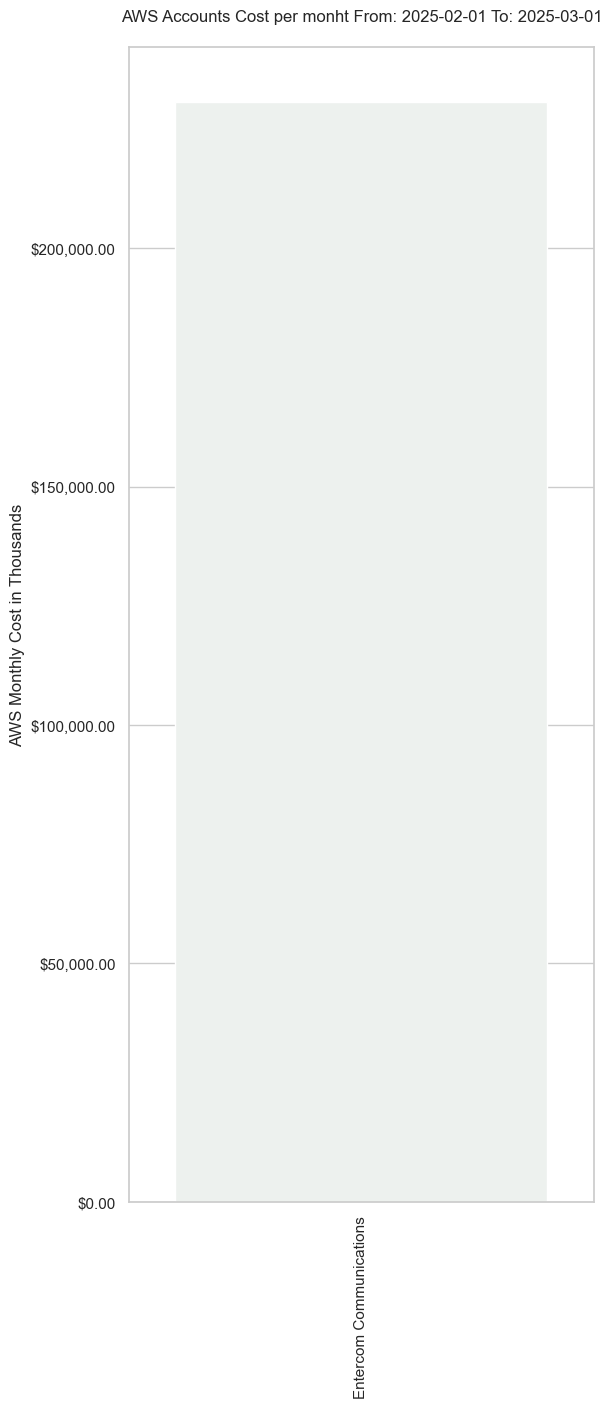

In [84]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 1
#sns.set_color_codes("pastel")
sns.barplot(y="Cost", x="Name", data=total_per_account_df,
            palette='light:g', hue='Name', legend=False)


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ylim=(0, 2500000),
ax.set(xlabel="",
       ylabel="AWS Monthly Cost in Thousands")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_title("AWS Accounts Cost per monht From: " + reportStart + " To: " + reportEnd + '\n')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
#sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Services over $2000 per monht on AWS Accounts From: 2025-02-01 To: 2025-03-01\n')

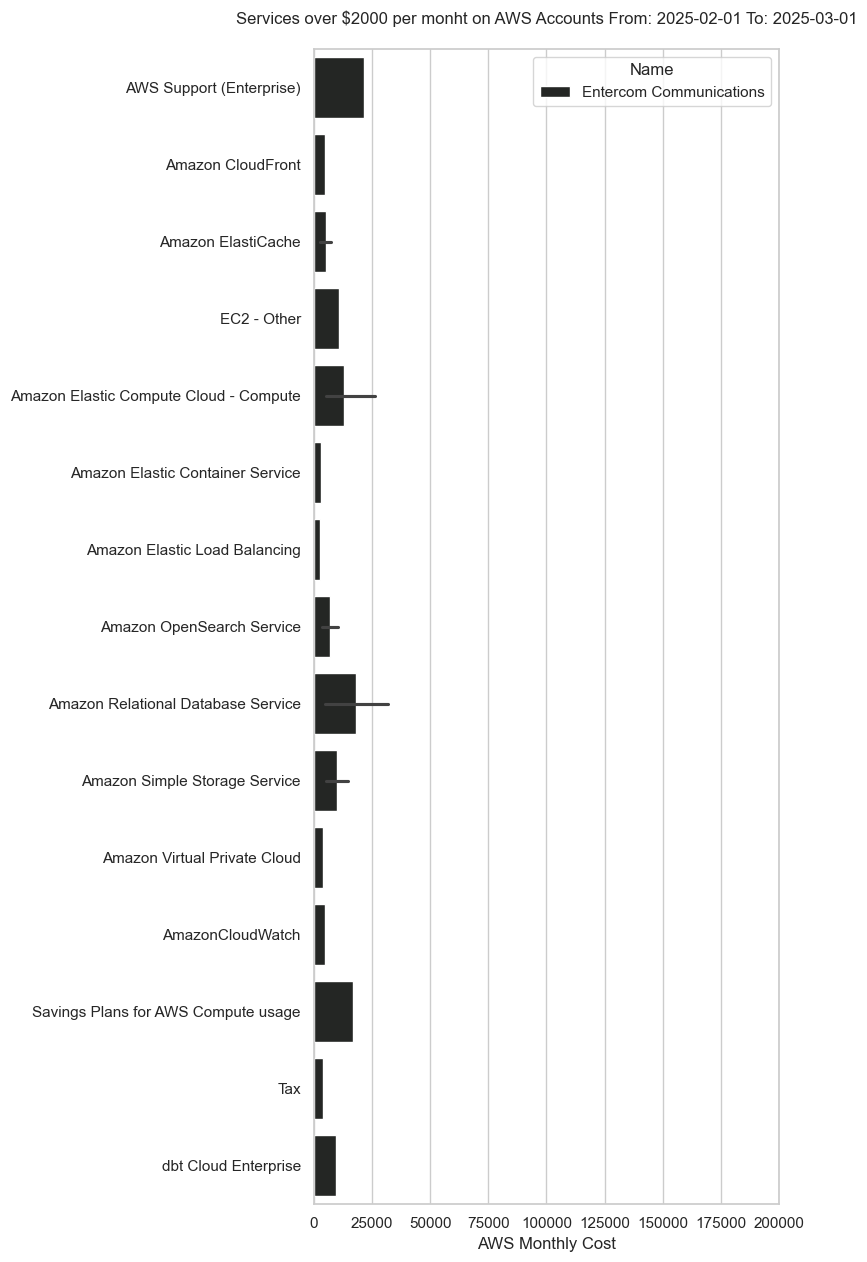

In [85]:

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 2000
sns.set_color_codes("pastel")
sns.barplot(x="Cost", y="Service", data=df[df.Cost >= monthly_cost ],
            palette='dark:g', hue='Name')

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200000), ylabel="",
       xlabel="AWS Monthly Cost")
ax.set_title("Services over $" + str(monthly_cost)+" per monht on AWS Accounts From: " + reportStart + " To: " + reportEnd + '\n')
#sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Services over $2000 per monht on AWS Accounts From: 2025-02-01 To: 2025-03-01\n')

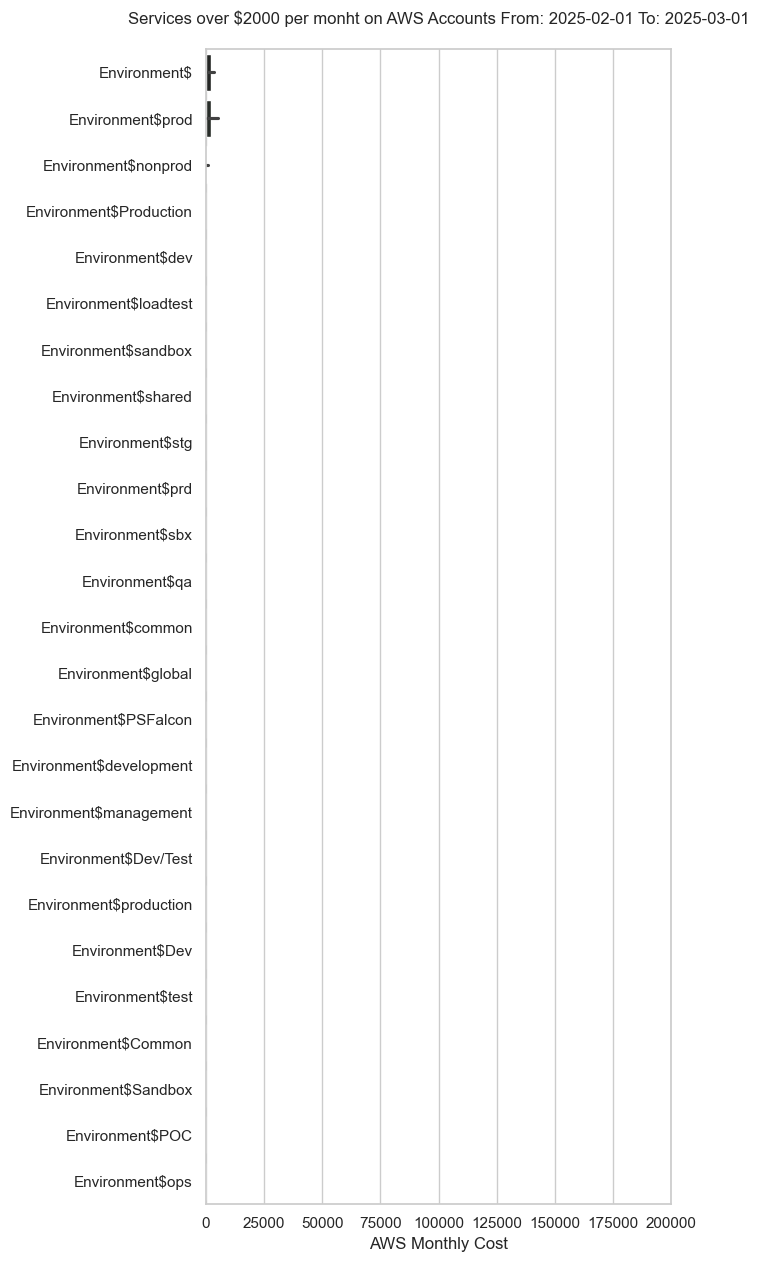

In [90]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 15))

monthly_cost = 2000
sns.set_color_codes("pastel")
sns.barplot(x="Cost", y="Enviroment", data=df,
            palette='dark:g', hue='Enviroment')

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200000), ylabel="",
       xlabel="AWS Monthly Cost")
ax.set_title("Services over $" + str(monthly_cost)+" per monht on AWS Accounts From: " + reportStart + " To: " + reportEnd + '\n')
#sns.despine(left=True, bottom=True)

<Axes: >

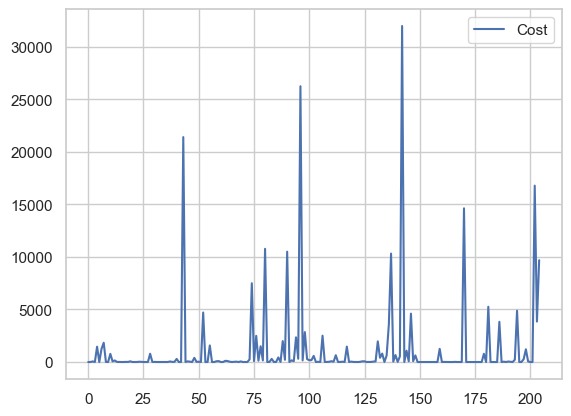

In [86]:
df.plot()

In [25]:
df[df['Cost'] > 200000]

,Month,Year,Name,Account,Service,Cost,Enviroment


In [301]:
df.iloc[208]

Month                                             ALL_YEAR
Year                                                  2024
Name                               Entercom Communications
Account                                       724972922289
Service       Docker Compose Server on Ubuntu Server 20.04
Cost                                                 22.32
Enviroment                                    Environment$
Name: 208, dtype: object

In [91]:
total_per_service_df = df.groupby(['Year','Service','Name']).agg(Total=('Cost','sum'))

In [92]:
total_per_service_df.head()

Total
Year Service                 Name                                
2025 AWS Amplify             Entercom Communications     0.001571
     AWS Backup              Entercom Communications    57.338881
     AWS Budgets             Entercom Communications     0.163800
     AWS Certificate Manager Entercom Communications  1456.000000
     AWS CloudFormation      Entercom Communications     0.000000

In [93]:
services_df = total_per_service_df[total_per_service_df['Total'] > 5000].sort_values(['Name','Total'])

In [94]:
services_df

Total
Year Service                                Name                                 
2025 Amazon CloudFront                      Entercom Communications   6287.056078
     AmazonCloudWatch                       Entercom Communications   6367.780471
     dbt Cloud Enterprise                   Entercom Communications   9687.500000
     Amazon ElastiCache                     Entercom Communications  11842.921090
     EC2 - Other                            Entercom Communications  13726.727629
     Amazon OpenSearch Service              Entercom Communications  14549.953007
     Savings Plans for AWS Compute usage    Entercom Communications  16780.800000
     Amazon Simple Storage Service          Entercom Communications  20676.687807
     AWS Support (Enterprise)               Entercom Communications  21401.389100
     Amazon Relational Database Service     Entercom Communications  37807.708506
     Amazon Elastic Compute Cloud - Compute Entercom Communications  39780.021987

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_11637/1883216754.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


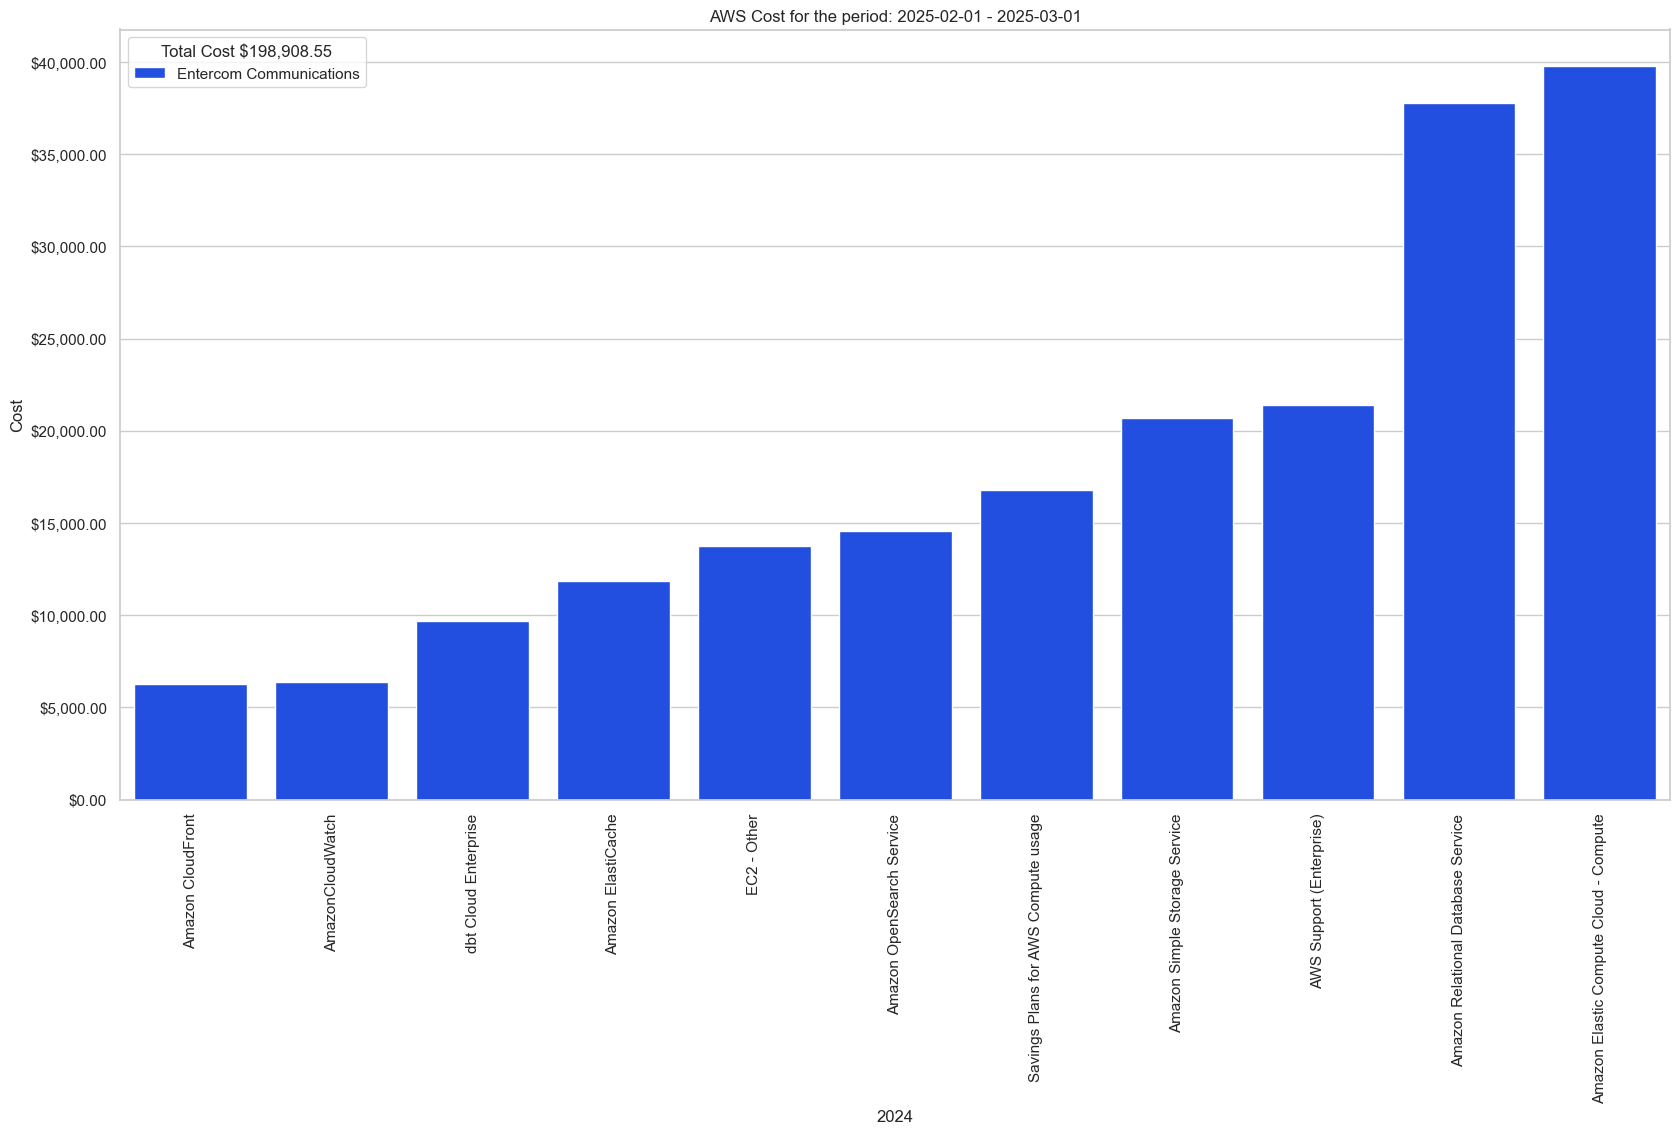

In [95]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x="Service", y="Total", data=services_df,
            hue='Name', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("2024")
ax.set_ylabel("Cost")
ax.set_title("AWS Cost for the period: "+ reportStart+" - " + reportEnd)
t = services_df['Total'].sum()
#t = services_df['Total'].sum() - (2 * df_AW['Cost'].sum())
#t_aw = df_AW['Cost'].sum()
# ax.legend(title="Total Cost without AW $"+str("{:,.2f}".format(t))+" --- AW Cost $ "+str("{:,.2f}".format(t_aw)))
ax.legend(title="Total Cost $"+str("{:,.2f}".format(t)))
#ax.set_title("AWS Total Cost for Jun, 2024 by Services over $100,000 \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost by Service")

# Reading all CSV Files:

In [96]:
import glob

# Get a list of all CSV files in the directory
csv_files = glob.glob('Monthly_Cost_For_*.csv')

# Create an empty list to store the DataFrames
dfs = [] 

# Loop over each CSV file and read it into a DataFrame
for file in csv_files:
    print("reading File: " + file)
    df = pd.read_csv(file) 
    dfs.append(df) 

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, axis=0, ignore_index=True) 
month_name = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
month_number = [1,2,3,4,5,6,7,8,9,10,11,12]
kafka_new ='Apache Kafka® & Apache Flink® on Confluent Cloud™ - Annual Commits'
kafka_old ='Apache Kafka® on Confluent Cloud™ - Annual Commits'
combined_df['Month No'] = combined_df['Month'].replace(month_name,month_number)
combined_df['Service'] = combined_df['Service'].replace('Datadog Pro','Datadog')
combined_df['Service'] = combined_df['Service'].replace(kafka_old,kafka_new)

# Print the combined DataFrame
combined_df.sample(30)

reading File: Monthly_Cost_For_OCT_2022.csv
reading File: Monthly_Cost_For_OCT_2023.csv
reading File: Monthly_Cost_For_OCT_2021.csv
reading File: Monthly_Cost_For_FEB_2024.csv
reading File: Monthly_Cost_For_JUN_2023.csv
reading File: Monthly_Cost_For_JUN_2022.csv
reading File: Monthly_Cost_For_FEB_2025.csv
reading File: Monthly_Cost_For_OCT_2024.csv
reading File: Monthly_Cost_For_FEB_2022.csv
reading File: Monthly_Cost_For_JUN_2024.csv
reading File: Monthly_Cost_For_FEB_2023.csv
reading File: Monthly_Cost_For_NOV_2022.csv
reading File: Monthly_Cost_For_NOV_2023.csv
reading File: Monthly_Cost_For_NOV_2021.csv
reading File: Monthly_Cost_For_AUG_2024.csv
reading File: Monthly_Cost_For_JAN_2022.csv
reading File: Monthly_Cost_For_JAN_2023.csv
reading File: Monthly_Cost_For_DEC_2024.csv
reading File: Monthly_Cost_For_NOV_2024.csv
reading File: Monthly_Cost_For_DEC_2021.csv
reading File: Monthly_Cost_For_AUG_2022.csv
reading File: Monthly_Cost_For_DEC_2023.csv
reading File: Monthly_Cost_For_J

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_11637/214107491.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['Month No'] = combined_df['Month'].replace(month_name,month_number)


,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
1061,205,JUN,2023,Entercom Communications,724972922289,CloudWatch Events,1878.308183,NaN,6
2523,164,NOV,2022,Entercom Communications,724972922289,Amazon Simple Email Service,8.852541,NaN,11
7561,219,MAR,2023,Entercom Communications,724972922289,WIZ Cloud Infrastructure Security Platform,20833.330000,NaN,3
7653,91,SEP,2023,Entercom Communications,724972922289,EC2 - Other,186.807741,NaN,9
8809,140,SEP,2022,Entercom Communications,724972922289,Amazon OpenSearch Service,7029.754270,NaN,9
5400,7,AUG,2023,Entercom Communications,724972922289,AWS CloudTrail,2774.076136,NaN,8
5517,124,AUG,2023,Entercom Communications,724972922289,Amazon GuardDuty,3398.603888,NaN,8
2565,206,NOV,2022,Entercom Communications,724972922289,CodeBuild,0.000000,NaN,11
2136,210,JUN,2024,Entercom Communications,724972922289,Savings Plans for AWS Compute usage,52416.000000,NaN,6
7580,18,SEP,2023,Entercom Communications,724972922289,AWS Global Accelerator,55.186656,NaN,9


In [97]:
#otal_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg({'Cost':'sum'}).sort_values(by='Month')
total_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg(Total_cost_per_Month=('Cost','sum')).sort_values(by='Month No')
total_per_month_df['Cost_in_Millions'] = total_per_month_df['Total_cost_per_Month']/1000
total_per_month_df 

Total_cost_per_Month  Cost_in_Millions
Year Month Month No                                        
2022 JAN   1                 4.806844e+05        480.684441
2023 JAN   1                 6.575551e+05        657.555146
2024 JAN   1                 8.108048e+05        810.804834
2025 JAN   1                 9.560546e+05        956.054633
2023 FEB   2                 6.126164e+05        612.616381
2024 FEB   2                 6.158228e+05        615.822808
2025 FEB   2                 2.306384e+05        230.638448
2022 FEB   2                 4.958688e+05        495.868775
     MAR   3                 5.622309e+05        562.230925
2024 MAR   3                 9.899129e+05        989.912922
2023 MAR   3                 1.637978e+06       1637.977724
     APR   4                 9.849516e+05        984.951620
2024 APR   4                 7.672112e+05        767.211239
2022 APR   4                 6.468500e+05        646.850021
     MAY   5                 1.344622e+06       1344.621561
2023 MAY   5                 6.614069e+05        661.406915
2024 MAY   5                 7.549222e+05        754.922180
2023 JUN   6                 1.430313e+06       1430.313230
2022 JUN   6                 7.066702e+05        706.670174
2024 JUN   6                 1.542014e+06       1542.013753
2023 JUL   7                 9.351995e+05        935.199451
2022 JUL   7                 8.148950e+05        814.895033
2024 JUL   7                 6.672585e+05        667.258506
2023 AUG   8                 5.614320e+05        561.431974
2024 AUG   8                 6.807256e+05        680.725631
2022 AUG   8                 6.280091e+05        628.009119
     SEP   9                 8.538617e+05        853.861659
2024 SEP   9                 1.027315e+06       1027.314587
2023 SEP   9                 5.759178e+05        575.917792
     OCT   10                6.052033e+05        605.203320
2021 OCT   10                3.794357e+05        379.435677
2022 OCT   10                6.337723e+05        633.772292
2024 OCT   10                6.605933e+05        660.593272
     NOV   11                6.257406e+05        625.740616
2023 NOV   11                5.514994e+05        551.499410
2022 NOV   11                6.198833e+05        619.883307
2021 NOV   11                4.499119e+05        449.911873
2023 DEC   12                1.467499e+06       1467.498900
2022 DEC   12                8.899484e+05        889.948351
2021 DEC   12                4.646831e+05        464.683131
2024 DEC   12                1.554002e+06       1554.001935

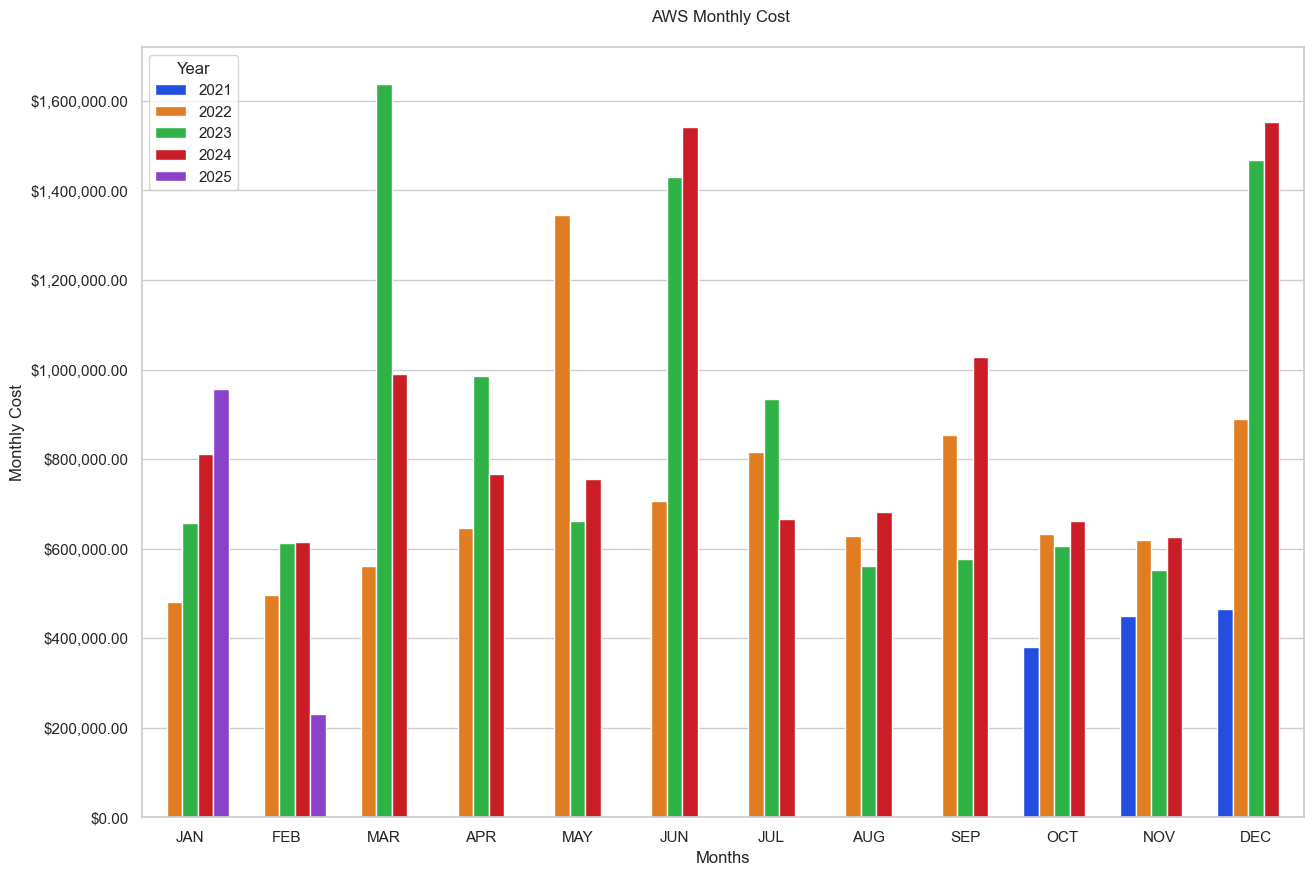

In [98]:

# Initialize the matplotlib figure
#sns.color_palette("viridis", as_cmap=True)
sns.color_palette("bright")
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Month", y="Total_cost_per_Month", data=total_per_month_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Months")
ax.set_ylabel("Monthly Cost")
ax.set_title("AWS Monthly Cost \n")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Monthly Cost")


#sns.despine(left=True, bottom=True)

In [99]:
df = combined_df.copy()
#df = combined_df[combined_df['Month No'] == 6]
#df = combined_df[combined_df['Year'] == 2024]

In [100]:
df.shape

(8891, 9)

In [101]:
df[df['Service'] == 'Datadog Pro']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No


In [102]:
df[df['Service'] == 'Datadog']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
1062,206,JUN,2023,Entercom Communications,724972922289,Datadog,796054.59,NaN,6
2132,206,JUN,2024,Entercom Communications,724972922289,Datadog,494544.00,NaN,6
3863,210,DEC,2024,Entercom Communications,724972922289,Datadog,494544.00,NaN,12
4733,206,DEC,2023,Entercom Communications,724972922289,Datadog,560894.70,NaN,12
5386,219,DEC,2022,Entercom Communications,724972922289,Datadog,235159.90,NaN,12
7556,214,MAR,2023,Entercom Communications,724972922289,Datadog,235159.90,NaN,3
8883,214,SEP,2022,Entercom Communications,724972922289,Datadog,235159.90,NaN,9


In [103]:
#otal_per_month_df = combined_df.groupby(['Year','Month','Month No']).agg({'Cost':'sum'}).sort_values(by='Month')
#total_per_service_df = combined_df[combined_df['Month No'] == 6]
total_per_service_df = df.groupby(['Year','Service']).agg(Total=('Cost','sum'))


In [104]:
total_per_service_df.head()

Total
Year Service                              
2021 AWS Backup               1.426541e+03
     AWS Certificate Manager  3.258000e+03
     AWS CloudShell           1.236140e-05
     AWS CloudTrail           1.048336e+04
     AWS CodeArtifact         5.500000e-09

In [105]:
services_df = total_per_service_df[total_per_service_df['Total'] > 50000]

In [106]:
services_df

Total
Year Service                                                 
2021 AWS Premium Support                         79091.530000
     Amazon CloudFront                           86263.658498
     Amazon ElastiCache                          52552.845915
     Amazon Elastic Compute Cloud - Compute     188912.534343
     Amazon OpenSearch Service                   65143.709978
...                                                       ...
2025 Amazon Relational Database Service         140638.960319
     Amazon Simple Storage Service               84706.890855
     EC2 - Other                                 61099.121831
     Red Canary Managed Detection and Response  234144.000000
     Savings Plans for AWS Compute usage         74165.400000

[81 rows x 1 columns]

In [107]:
combined_df[combined_df['Service'] == 'Red Canary Managed Detection and Response']

,Unnamed: 0,Month,Year,Name,Account,Service,Cost,Enviroment,Month No
4950,210,JAN,2024,Entercom Communications,724972922289,Red Canary Managed Detection and Response,227217.6,NaN,1
5163,208,JAN,2025,Entercom Communications,724972922289,Red Canary Managed Detection and Response,234144.0,Environment$,1


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_11637/3737692156.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


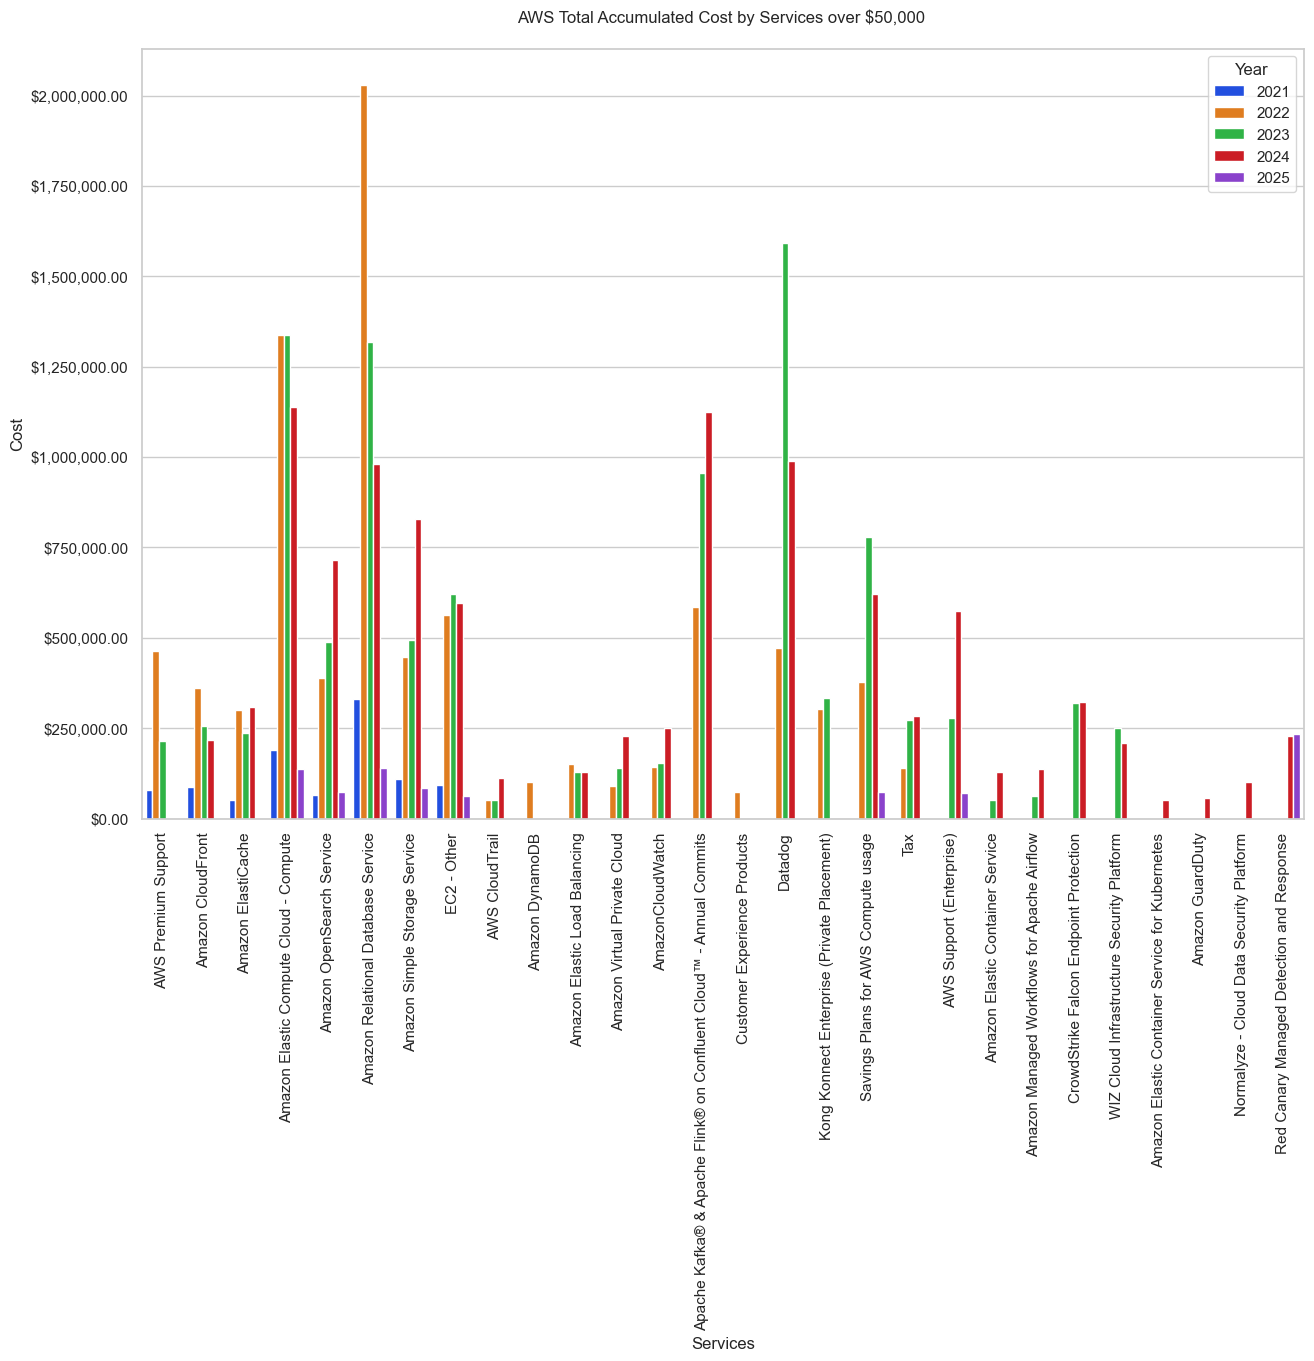

In [108]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Service", y="Total", data=services_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Services")
ax.set_ylabel("Cost")
ax.set_title("AWS Total Accumulated Cost by Services over $50,000 \n")
#ax.set_title("AWS Total Cost for Jun, 2024 by Services over $10,000 \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost by Service")

In [109]:
total_per_account_df = combined_df.groupby(['Year','Name']).agg(Total=('Cost','sum'))

In [110]:
total_per_account_df

,,Total
Year,Name,
2021,Entercom Communications,1.294031e+06
2022,Entercom Communications,8.677296e+06
2023,Entercom Communications,1.068157e+07
2024,Entercom Communications,1.069632e+07
2025,Entercom Communications,1.186693e+06


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_11637/4280847152.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


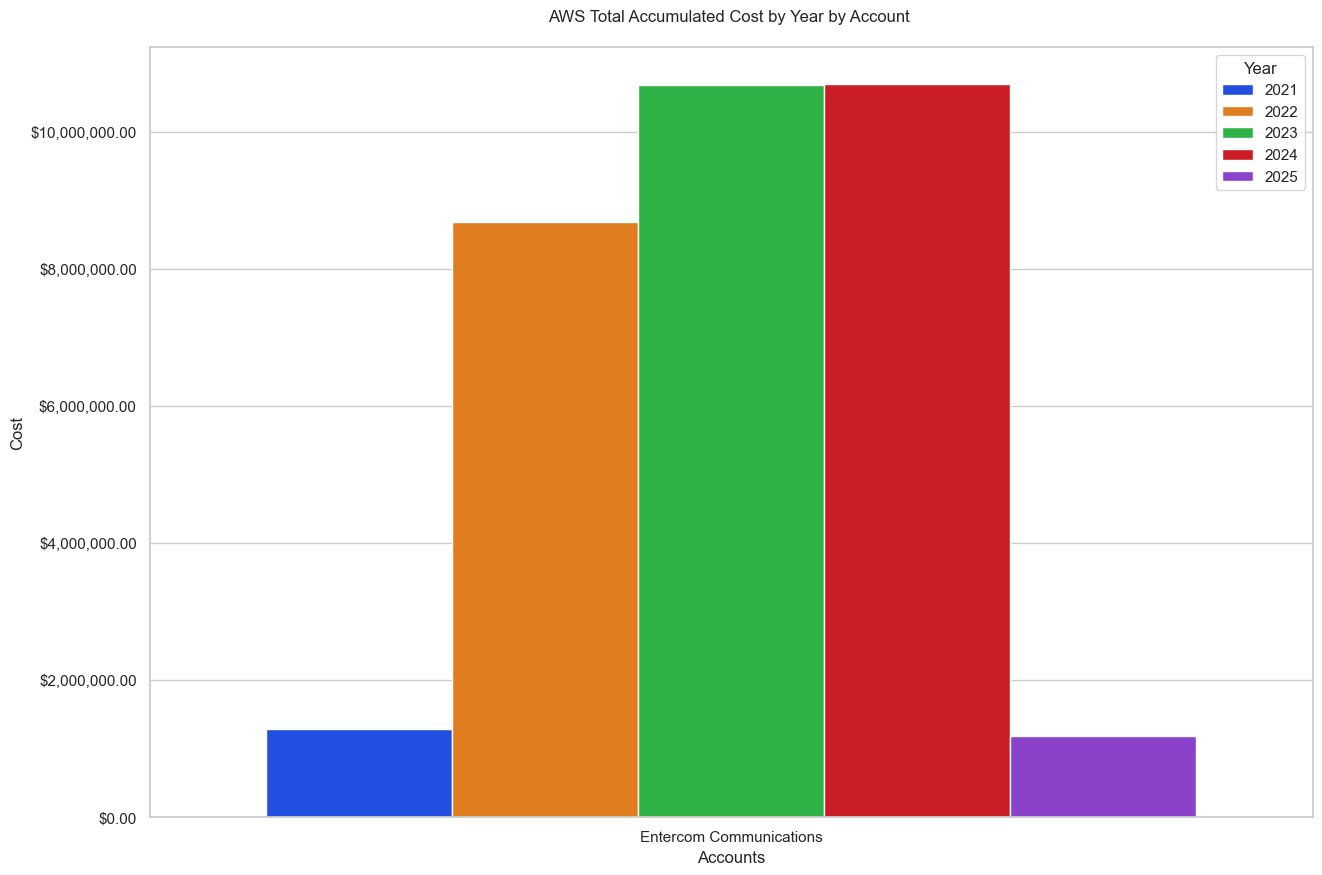

In [111]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="Name", y="Total", data=total_per_account_df,
            hue='Year', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Accounts")
ax.set_ylabel("Cost")
ax.set_title("AWS Total Accumulated Cost by Year by Account \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.2f}".format(int(x))))
plt.savefig("AWS Yearly Cost")

In [120]:
services_df = total_per_service_df[total_per_service_df['Total'] > 10]
x = services_df.sort_values(by=['Service','Year'])
x = x.reset_index()


In [121]:

total = 0
for index, row in x.iterrows():
    #print(row['Year'], row['Service'], row['Total'], index)
    #print(x.iloc[index,0])
    if row['Year'] == 2025:
        if index > 0 :
            #print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
            #print(" * ",row['Year'], row['Service'], row['Total'], index)
            #print("+1 ",x.iloc[index+1,1], x.iloc[index+1,0], x.iloc[index+1,2], index+1)
            if x.iloc[index-1,0] == row['Service']:
                None
                #print(".",end="")
                # print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                # print(" * ",row['Year'], row['Service'], row['Total'], index)
            else:
                #print("")
                #print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                print(" * ",row['Year'], row['Service'], row['Total'], index)
                total = total + row['Total']
        else:
            if x.iloc[index+1,0] == row['Service']:
                None
                #print(".",end="")
                # print("-1 ",x.iloc[index-1,1], x.iloc[index-1,0], x.iloc[index-1,2], index-1)
                # print(" * ",row['Year'], row['Service'], row['Total'], index)
            else:
                #print("")
                #print("+1 ",x.iloc[index+1,1], x.iloc[index+1,0], x.iloc[index+1,2], index+1)
                print(" * ",row['Year'], row['Service'], row['Total'], index)  
                total = total + row['Total']        
print("Total $ in New Services ",total)



 *  2025 AWS Backup 177.0471520664 4
 *  2025 AWS Certificate Manager 1456.0 9
 *  2025 AWS CloudTrail 4267.7932087043 14
 *  2025 AWS Config 5597.39271 19
 *  2025 AWS Cost Explorer 40.7862 23
 *  2025 AWS Database Migration Service 2741.6741690379 30
 *  2025 AWS Directory Service 494.12366115 35
 *  2025 AWS Elemental MediaLive 27.0816 40
 *  2025 AWS Global Accelerator 33.8570972152 47
 *  2025 AWS Glue 14.4360912696 51
 *  2025 AWS Key Management Service 328.820238538 56
 *  2025 AWS Lambda 4082.2132638381 61
 *  2025 AWS Secrets Manager 212.0174806031 69
 *  2025 AWS Security Hub 710.1294109 74
 *  2025 AWS Support (Enterprise) 49246.7885 79
 *  2025 AWS Transfer Family 203.8023883235 84
 *  2025 AWS WAF 1581.0202725838 89
 *  2025 AWS X-Ray 47.56615955 94
 *  2025 Amazon API Gateway 97.2144196157 99
 *  2025 Amazon CloudFront 23456.071145917 106
 *  2025 Amazon Cognito 91.25025 111
 *  2025 Amazon Detective 307.2288293262 116
 *  2025 Amazon DocumentDB (with MongoDB compatibilit